# **KDD - Experiment 04**

*    **SIA VASHIST**
*    PRN: 20190802107

---

### **Detecting outliers using standard deviation :**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def generate_scores(mean=60,std_dev=12,num_samples=200):
    np.random.seed(27)
    scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
    scores = np.round(scores, decimals=0)
    return scores
scores_data = generate_scores()

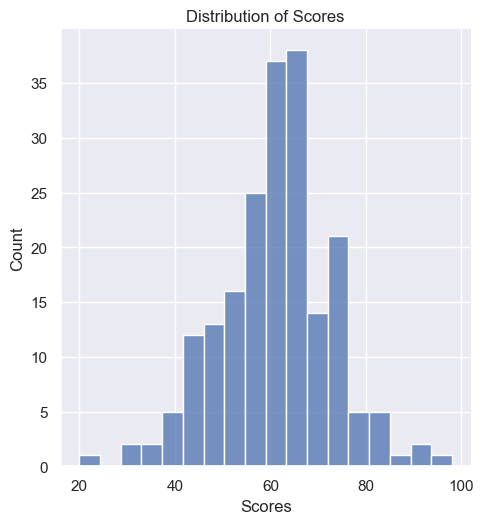

In [3]:
sns.set_theme()
sns.displot(data=scores_data).set(title="Distribution of Scores", xlabel="Scores")

In [4]:
df_scores = pd.DataFrame(scores_data,columns=['score'])

In [5]:
df_scores.mean()

score    61.005
dtype: float64

In [6]:
df_scores.std()

score    11.854434
dtype: float64

In [7]:
lower_limit = df_scores.mean() - 3*df_scores.std()
upper_limit = df_scores.mean() + 3*df_scores.std()
print(lower_limit)
print(upper_limit)

score    25.441697
dtype: float64
score    96.568303
dtype: float64


In [8]:
df_scores_filtered = df_scores[(df_scores[['score']]>lower_limit) & (df_scores[['score']]<upper_limit)]
df_scores_filtered

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0
...,...
195,76.0
196,67.0
197,74.0
198,NaN


### Detecting outliers using Z-score :

In [9]:
def detect_outliers(scores):
    z_scores = (scores - np.mean(scores)) / np.std(scores)
    outliers = np.abs(z_scores) > 3
    return outliers


In [10]:
scores = generate_scores()
outliers = detect_outliers(scores)
print(outliers)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [11]:
df_scores['z_score']=(df_scores['score'] - df_scores['score'].mean())/df_scores['score'].std()
df_scores.head()

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291


In [12]:
df_scores_filtered= df_scores[(df_scores['z_score']>-3) & (df_scores['z_score']<3)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]


### Detect Outliers Using the Interquartile Range (IQR) :

In [13]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

[Text(0.5, 1.0, 'Box Plot of Scores')]

In [14]:
df_scores.describe()

,score,z_score
count,200.000000,2.000000e+02
mean,61.005000,-1.787459e-16
std,11.854434,1.000000e+00
min,20.000000,-3.459043e+00
25%,54.000000,-5.909181e-01
50%,62.000000,8.393484e-02
75%,67.000000,5.057179e-01
max,98.000000,3.120773e+00


In [15]:
IQR = 67-54
lower_limit = 54 - 1.5*IQR
upper_limit = 67 + 1.5*IQR
print(upper_limit)
print(lower_limit)

86.5
34.5


In [16]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[192 rows x 2 columns]


In [17]:
q25,q75 = np.percentile(a = df_scores,q=[25,75])
IQR = q75 - q25
print(IQR)

61.91606516404945


### Detect Outliers Using Percentile :

In [18]:
lower_limit, upper_limit = np.percentile(a=df_scores,q=[0.5,99.5])
print(upper_limit)
print(lower_limit)

90.005
-2.6998335925602515


In [19]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]


# Conclusion:
> In conclusion, the choice of outlier detection and handling method depends on the nature of the data and the statistical assumptions being made. While standard deviation and z-score methods are commonly used for normally distributed data, the IQR method is more robust and suitable for non-normal data. It is important to carefully consider the properties of the data and the goals of the analysis when deciding which method to use.